# **Survey description**



*   Data gathered in **May and June 202**4
*   65,437 responses
*   185 countries
*   Recruited primarily through Stack Overflow channels




In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Try to read the CSV file, handling potential parsing errors
try:
    data = pd.read_csv("survey_results_public.csv")
except pd.errors.ParserError as e:
    # If a ParserError occurs, print the error message and the problematic row
    print(f"Error: {e}")
    print(f"Problematic row (or around it): {e.lineno}")
    # Try to read the file again, skipping the problematic row
    data = pd.read_csv("survey_results_public.csv", skiprows=[e.lineno - 1])  # Skip the row before the error

pd.set_option("display.max_columns", None)
# data[:30]
data.head()



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

In order to discover what is the largest group of participants, we analyse their age and nationality. We also check what they mostly use coding for.

<Axes: title={'center': 'Participants Age'}>

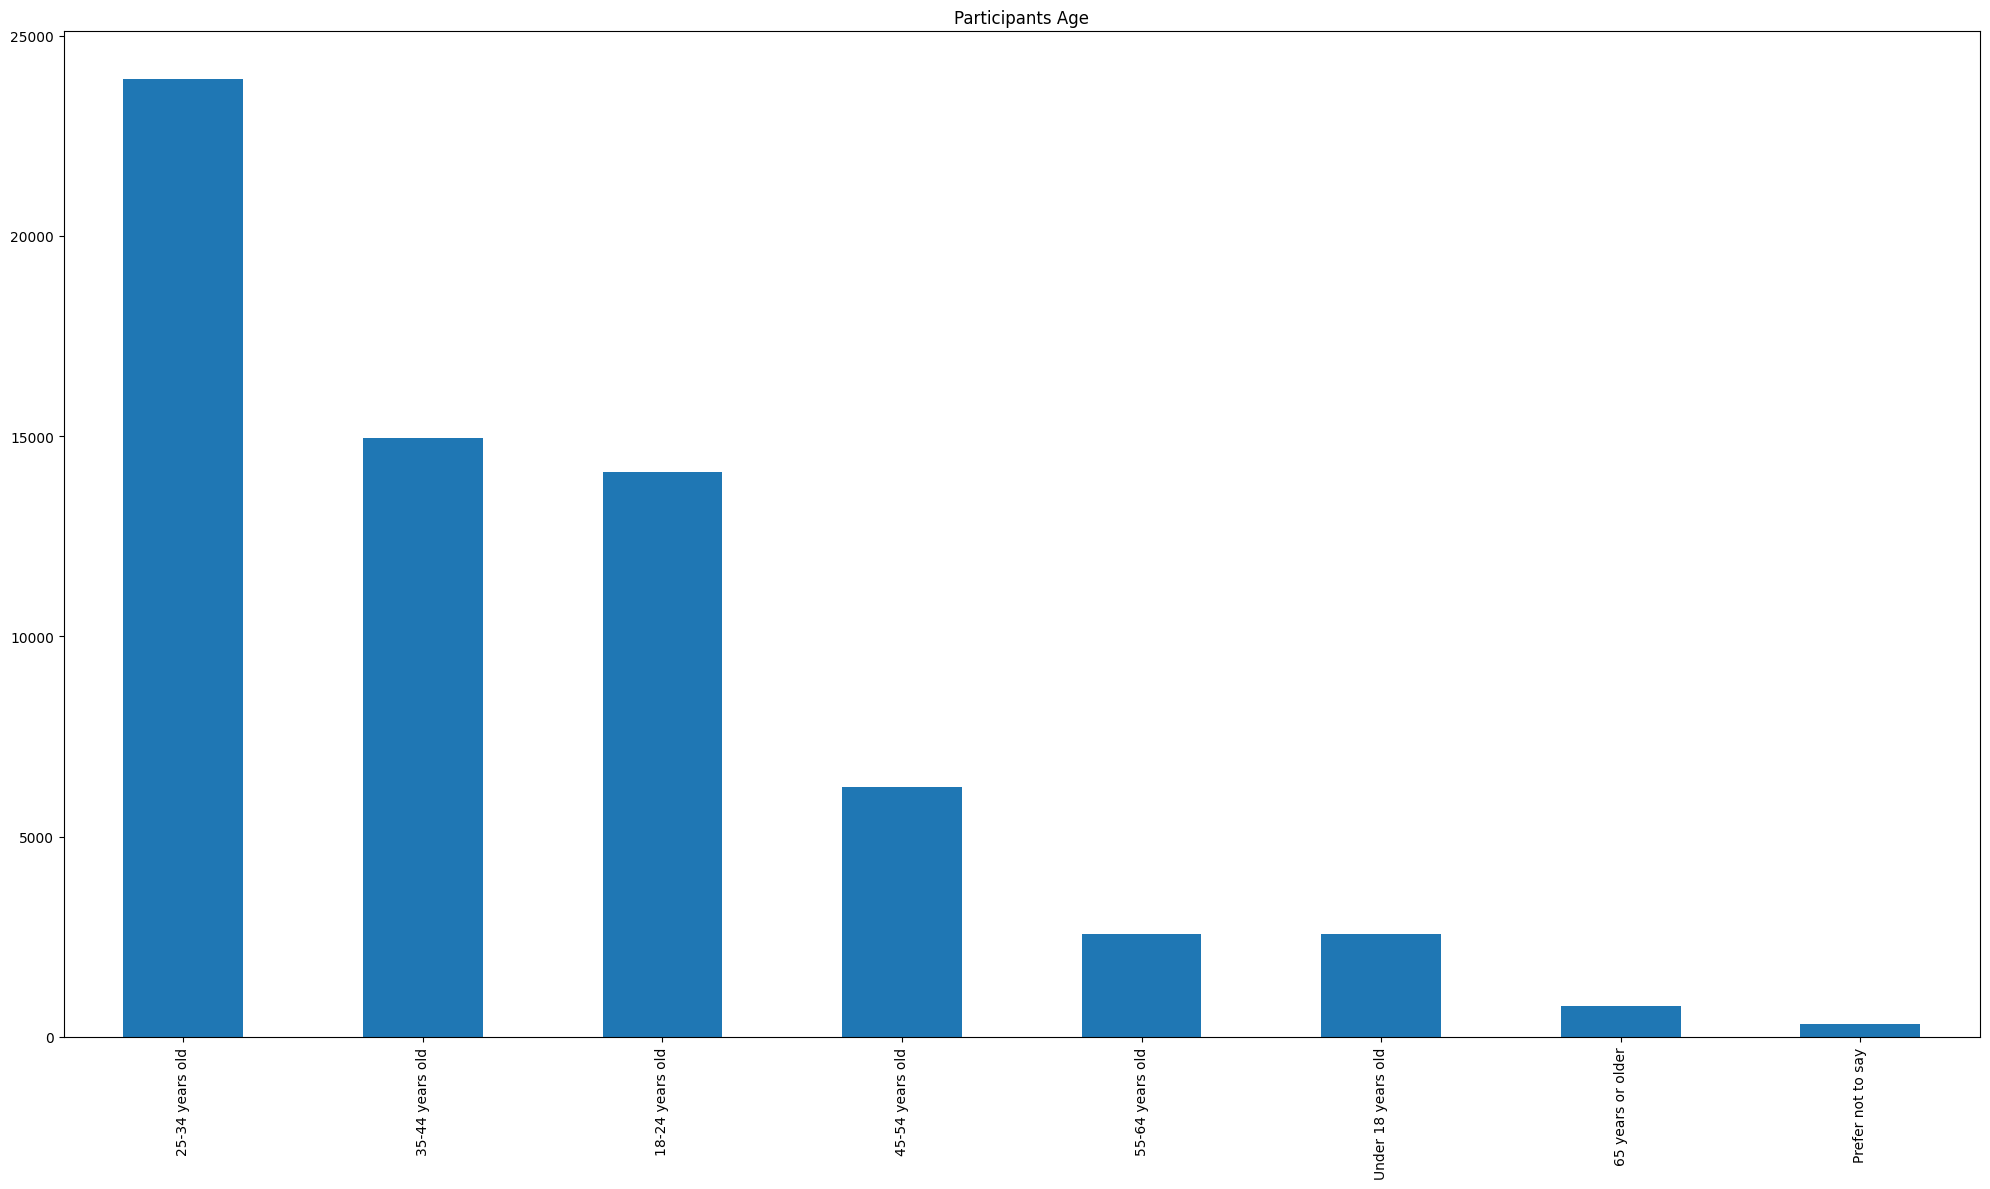

In [38]:
age=data['Age'].value_counts()

age.plot(x='Age',y='count',kind='bar', title='Participants Age', xlabel='')


<Axes: title={'center': 'Participants Country'}>

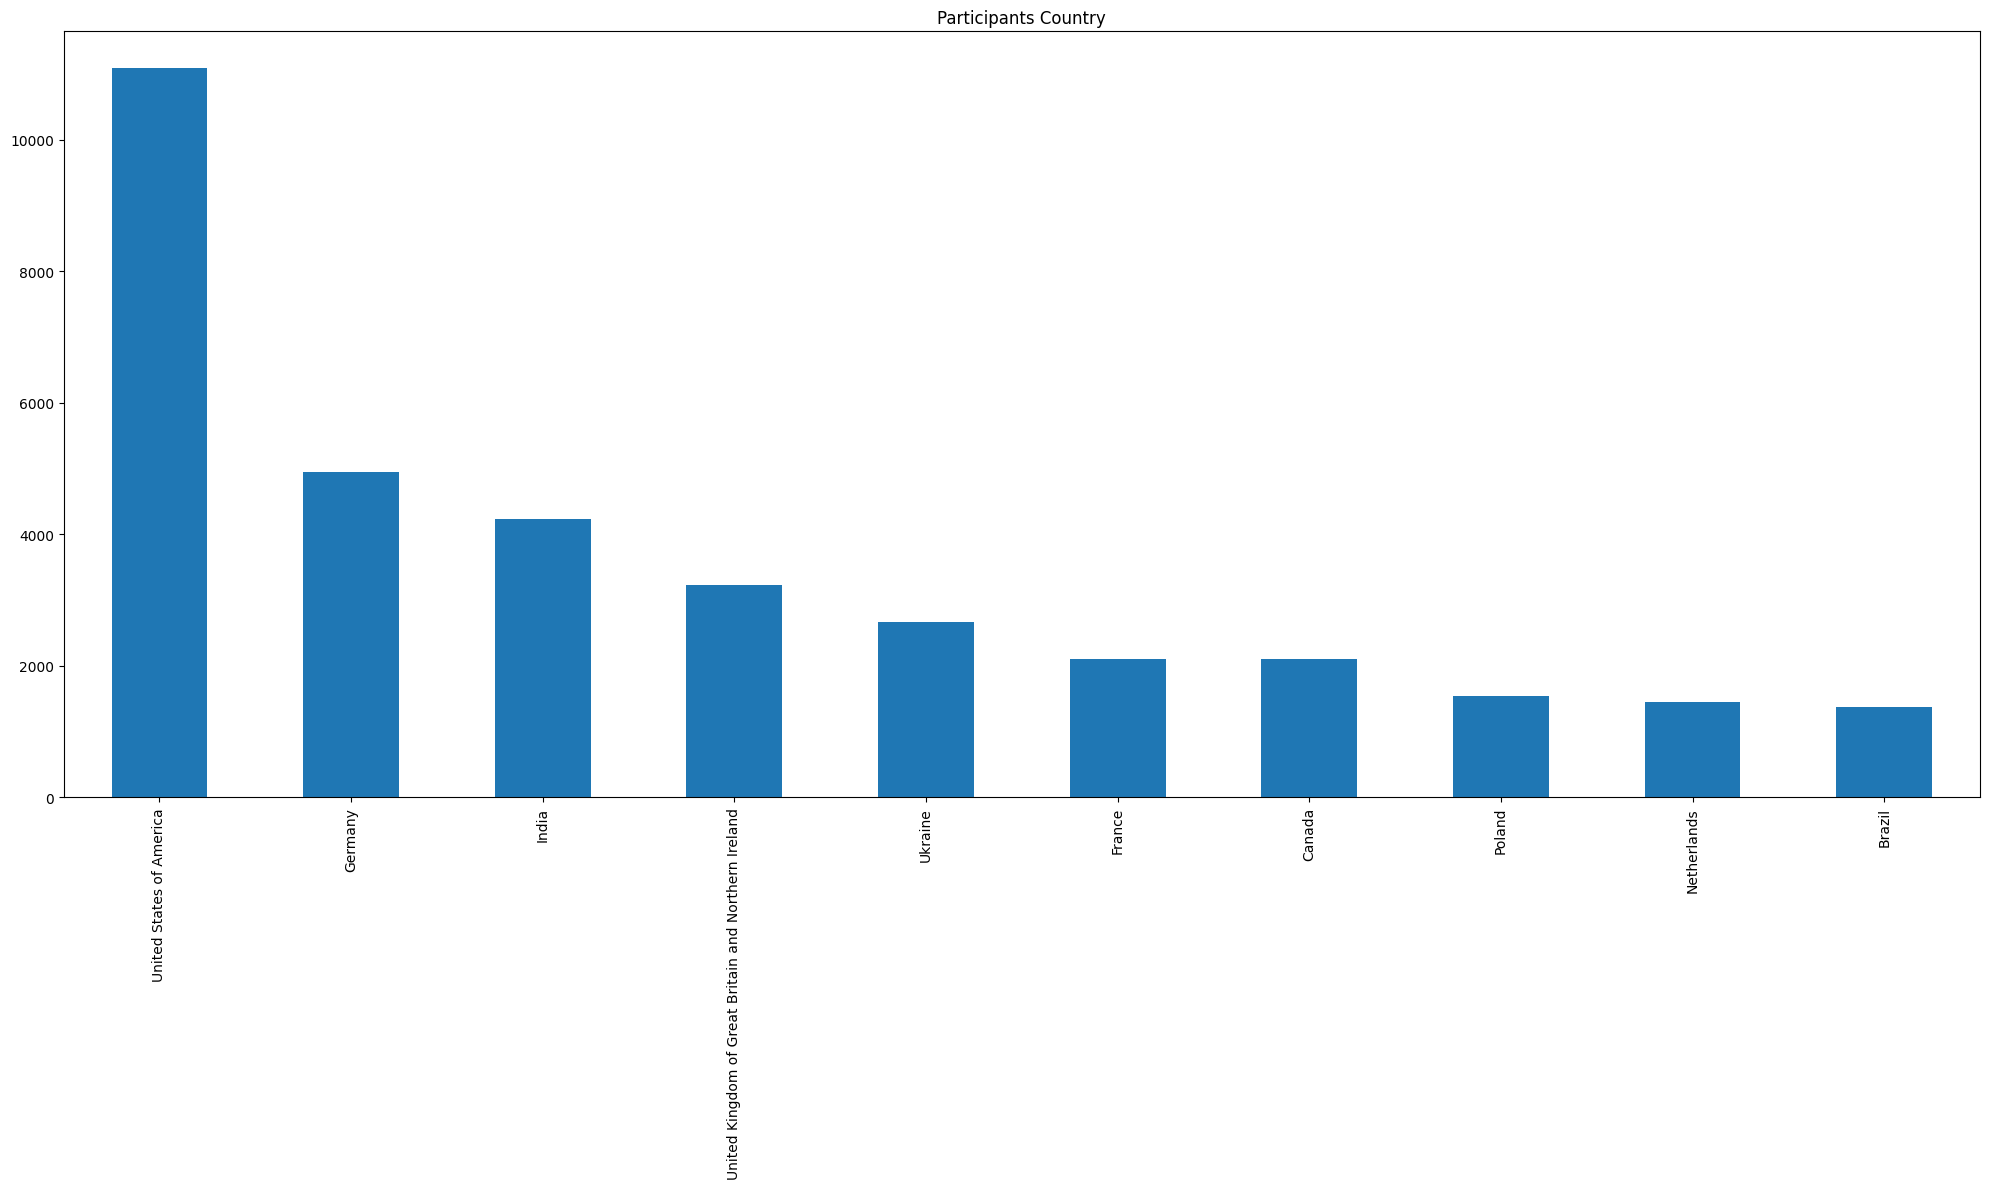

In [39]:
top10_countries=data['Country'].value_counts().iloc[:10]

top10_countries.plot(y='count',kind='bar', title='Participants Country', xlabel='')

<Axes: title={'center': 'In which way do you use coding?'}>

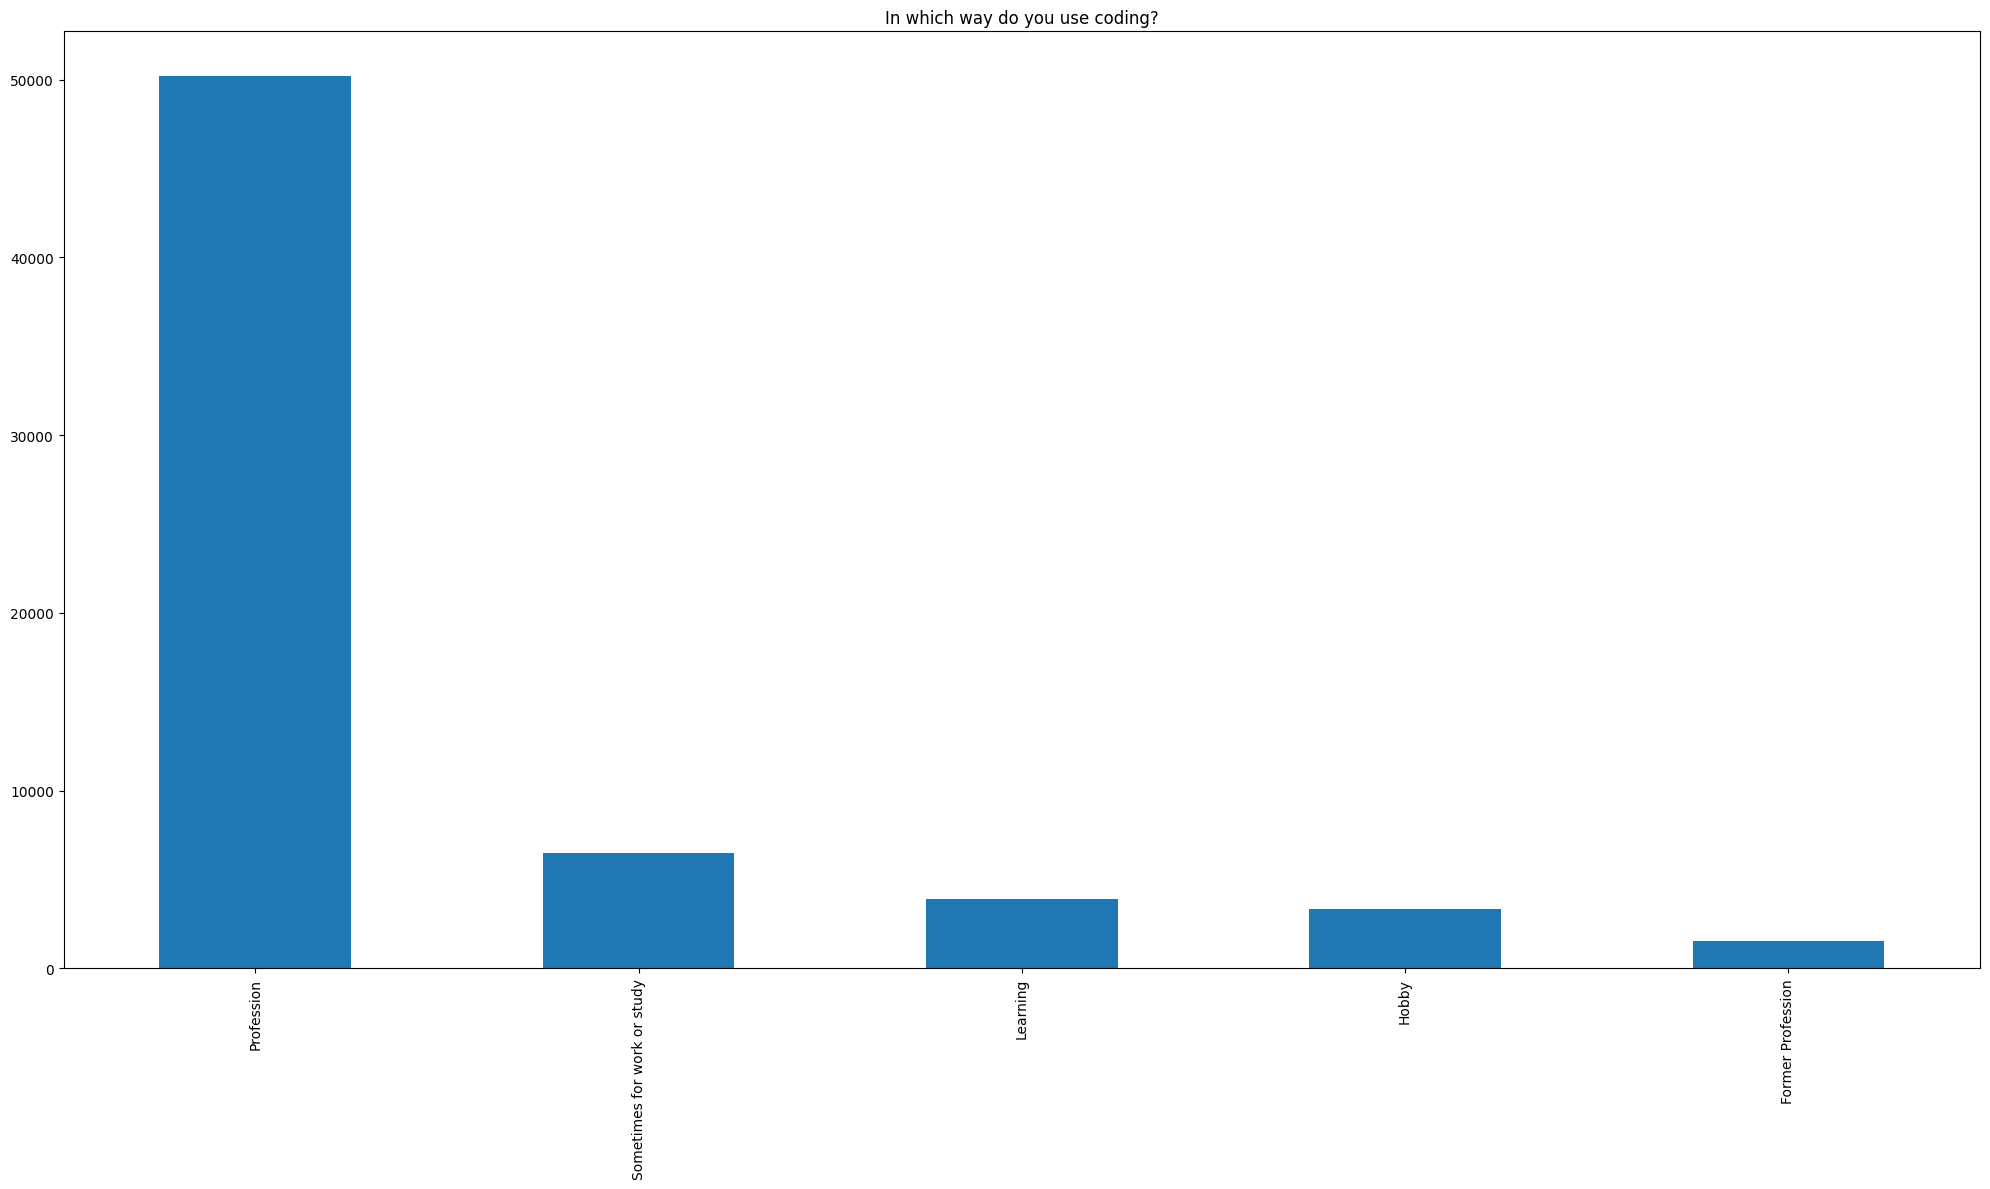

In [40]:
main_branch=data['MainBranch'].value_counts()

short_answers = {
    'I am a developer by profession': 'Profession',
    'I am learning to code': 'Learning',
    'I code primarily as a hobby': 'Hobby',
    'I used to be a developer by profession, but no longer am': 'Former Profession',
    'I am not primarily a developer, but I write code sometimes as part of my work/studies': 'Sometimes for work or study'
}

main_branch.index = main_branch.index.map(short_answers)

main_branch.plot(y='count',kind='bar', title='In which way do you use coding?', xlabel= '')

# Respondets are mostly:

*   Developers
*   From USA ( the rest is mostly from India and European countries)
*   Aged 18-54





In [41]:
polish_data=data[data['Country']=='Poland']

print("Participants from Poland: ",len(polish_data))

Participants from Poland:  1534


In [42]:
#Names are too long on the pie chart, so we shorten them
short_answers = {
    'Developer, full-stack': 'Full-stack',
    'Developer, back-end': 'Back-end',
    'Developer, front-end': 'Front-end',
    'Other (please specify):': 'Other',
    'Developer, mobile': 'Mobile',
    'Developer, embedded applications or devices': 'Embedded',
    'Developer, desktop or enterprise applications': 'Desktop or enterprise',
    'Student': 'Student',
    'DevOps specialist': 'DevOps',
    'Research & Development role': 'R&D',
    'Engineering manager': 'Engineering manager',
    'Academic researcher': 'Academic researcher',
    'Data engineer': 'Data engineer',
    'Data scientist or machine learning specialist': 'Data scientist/ML',
    'Senior Executive (C-Suite, VP, etc.)': 'Executive',
    'Developer, game or graphics': 'Game/Graphics dev',
    'Cloud infrastructure engineer': 'Cloud engineer',
    'System administrator': 'SysAdmin',
    'Developer, AI': 'AI dev',
    'Developer, QA or test': 'QA/Test dev',
    'Data or business analyst': 'Data/Business analyst',
    'Project manager': 'Project manager',
    'Security professional': 'Security professional',
    'Educator': 'Educator',
    'Scientist': 'Scientist',
    'Engineer, site reliability': 'SRE',
    'Product manager': 'Product manager',
    'Blockchain': 'Blockchain',
    'Developer Experience': 'DevEx',
    'Hardware Engineer': 'Hardware engineer',
    'Designer': 'Designer',
    'Database administrator': 'DBA',
    'Developer Advocate': 'Developer advocate',
    'Marketing or sales professional': 'Marketing/Sales'
}



#We want to have the same colors for the chart with data from Poland and all aroud the world
job_colors = {
    'Full-stack': '#A0525A',
    'Back-end': '#DEB887',
    'Front-end': '#F4A460',
    'Other': '#D2691E',
    'Mobile': '#CD5C5C',
    'Embedded': '#BDB76B',
    'Desktop or enterprise': '#F5DEB3',
    'Student': '#E9967A',
    'DevOps': '#9A9B73',
    'Engineering manager': '#DAA520',
    'R&D': '#BC8F8F',
    'Academic researcher':'#BDB99B'
}




Index(['Full-stack', 'Back-end', 'Student', 'Front-end',
       'Desktop or enterprise', 'Other', 'Mobile', 'Embedded',
       'Engineering manager', 'Academic researcher'],
      dtype='object', name='DevType')


<Axes: title={'center': 'World: Top 10 types of developers'}>

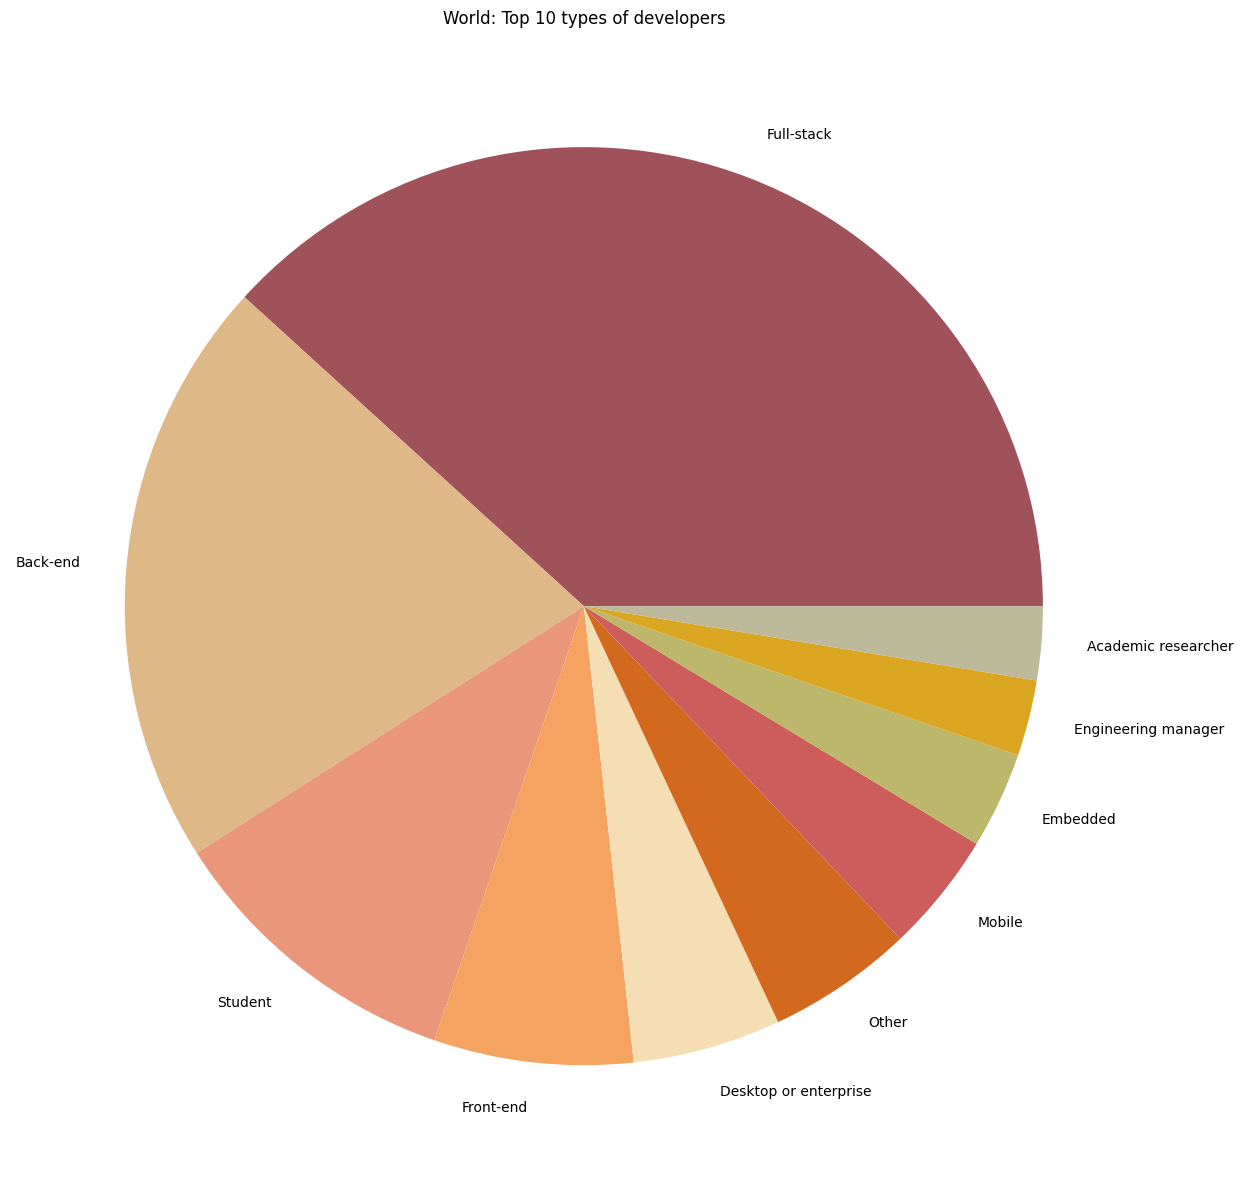

In [43]:
#From all posible values of cell 'DevType' we choose 10 most common
main_dev_type=data['DevType'].value_counts().iloc[:10]

#We set shorter versions of labels on the pie chart
main_dev_type.index = main_dev_type.index.map(short_answers)

print(main_dev_type.index)
#We use chosen colors for the pie chart
world_colors = [job_colors[job] for job in main_dev_type.index]

main_dev_type.plot(ylabel='',kind='pie', title='World: Top 10 types of developers', xlabel= '',colors=world_colors)

<Axes: title={'center': 'Poland: Top 10 types of developers'}>

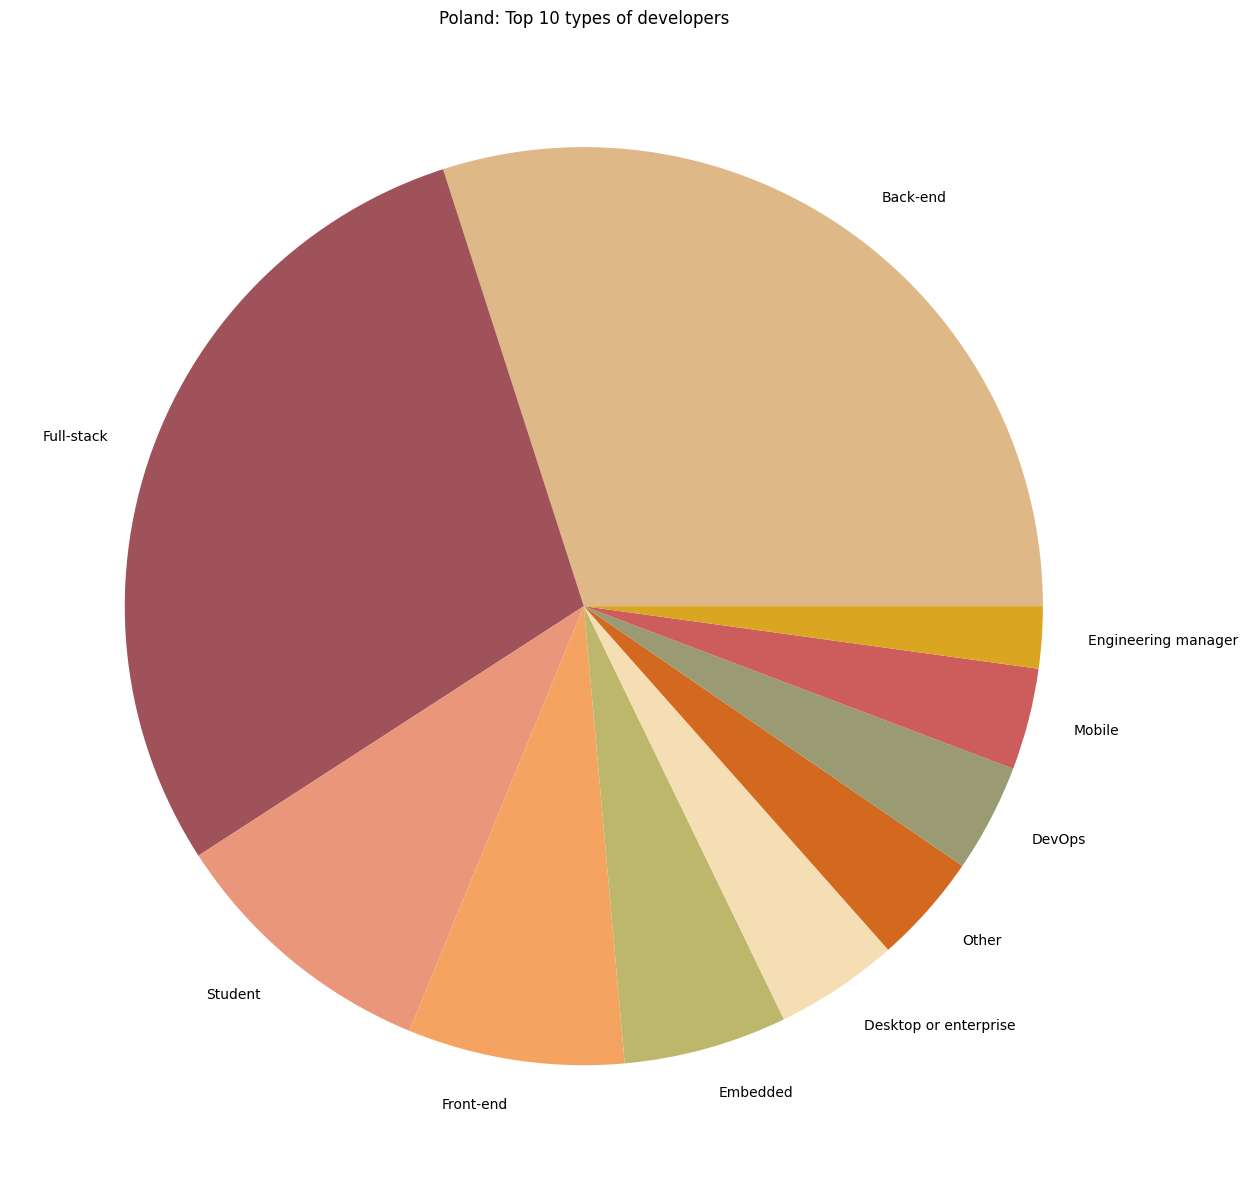

In [44]:
#From all posible values of cell 'DevType' we choose 10 most common
main_dev_type_poland=polish_data['DevType'].value_counts().iloc[:10]


#We set shorter versions of labels on the pie chart
main_dev_type_poland.index = main_dev_type_poland.index.map(short_answers)

#We use chosen colors for the pie chart
poland_colors = [job_colors[job] for job in main_dev_type_poland.index]

main_dev_type_poland.plot(ylabel='',kind='pie', title='Poland: Top 10 types of developers', xlabel= '', colors=poland_colors)

We see that the polish distribution of branches in IT is **similar** to the international one.

The main difference is that the percentage of **full stack** developer is **smaller for Poland**, while the percentage for **backend** developers is **bigger**.


Another difference is about **academic researchers and DevOps**. The first is not included in top 10 IT branches for Poland, while the second is not included in top 10 when it comes to international data.

<ipython-input-45-3e119bd1d5cf>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Age'] = pd.Categorical(filtered_data['Age'], categories=age_order, ordered=True)


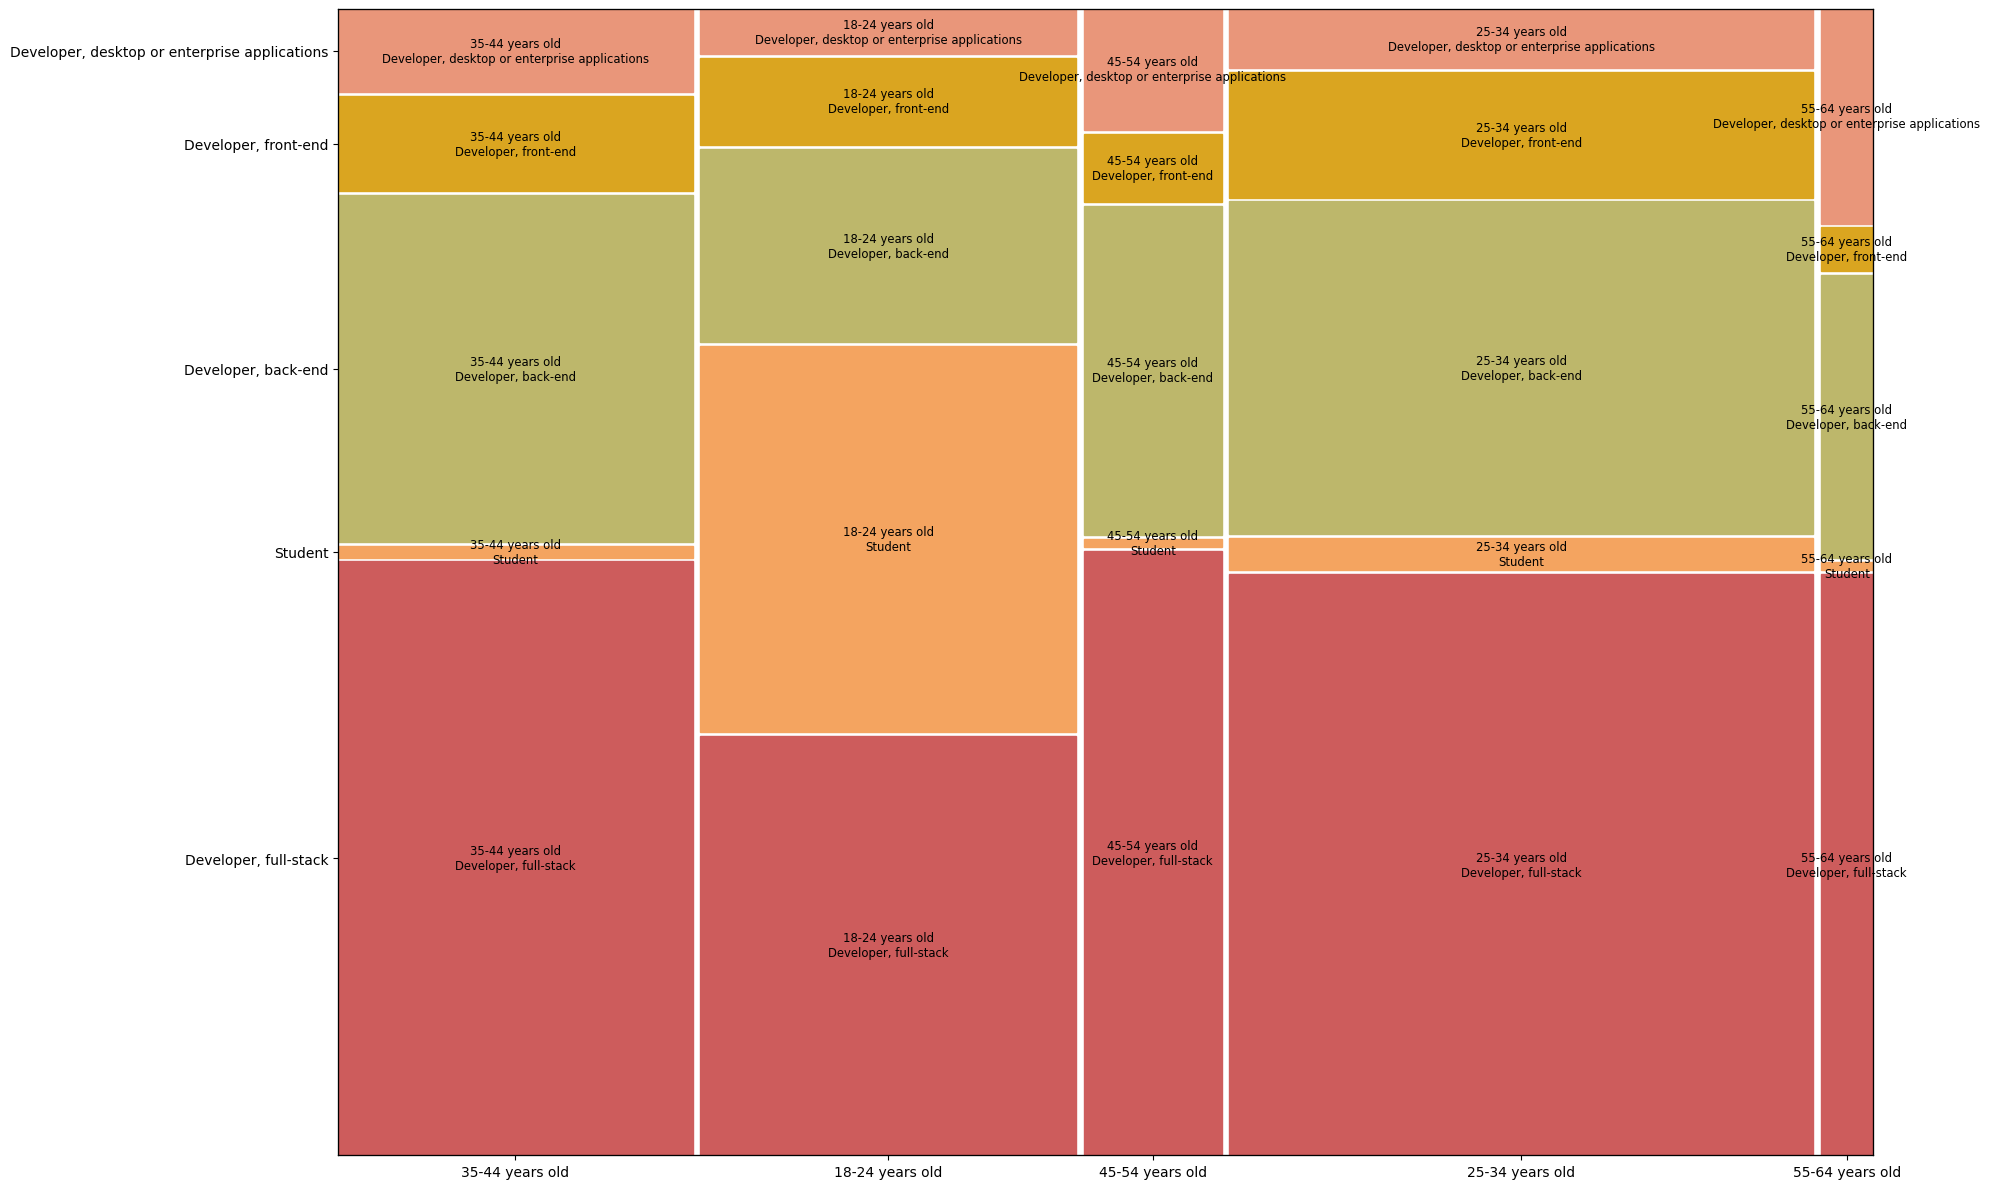

In [45]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams["figure.figsize"] = [20.00, 12.00]
plt.rcParams["figure.autolayout"] = True

#We exclude the smallest age groups in order to make mosaic plot more clear
exclude_age=['Prefer not to say','Under 18 years old', '65 years or older']
filtered_data = data[~data['Age'].isin(exclude_age)]

#We use top 5 DevTypes to make mosaic plot more clear
top_5_devtypes = data['DevType'].value_counts().nlargest(5).index
filtered_data = filtered_data[filtered_data['DevType'].isin(top_5_devtypes)]

age_order = ['18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old']
filtered_data['Age'] = pd.Categorical(filtered_data['Age'], categories=age_order, ordered=True)

colors = ['#CD5C5C', '#BDB76B', '#F4A460', '#DAA520', '#E9967A']


def get_color(key):
    index = top_5_devtypes.tolist().index(key[1])
    return {'color': colors[index]}

mosaic(filtered_data, ['Age', 'DevType'], properties=get_color)
plt.show()

Now we analyse how the **age of participants influences the main branches that they work in**. We excluded the smallest age groups in order to make the graph more clear.

The most obvious difference is that there is a large group of  students in age of 18-24 and it gets smaller with the rise of age.

Another observation that we can make is that the older the group is, the bigger the percentage of **desktop and enterprise applications** developers.

The percentage of 18-24 full-stack and backend developers is relatively low.


We can also notice that the widest group of people working in any of IT branches is 25-34.

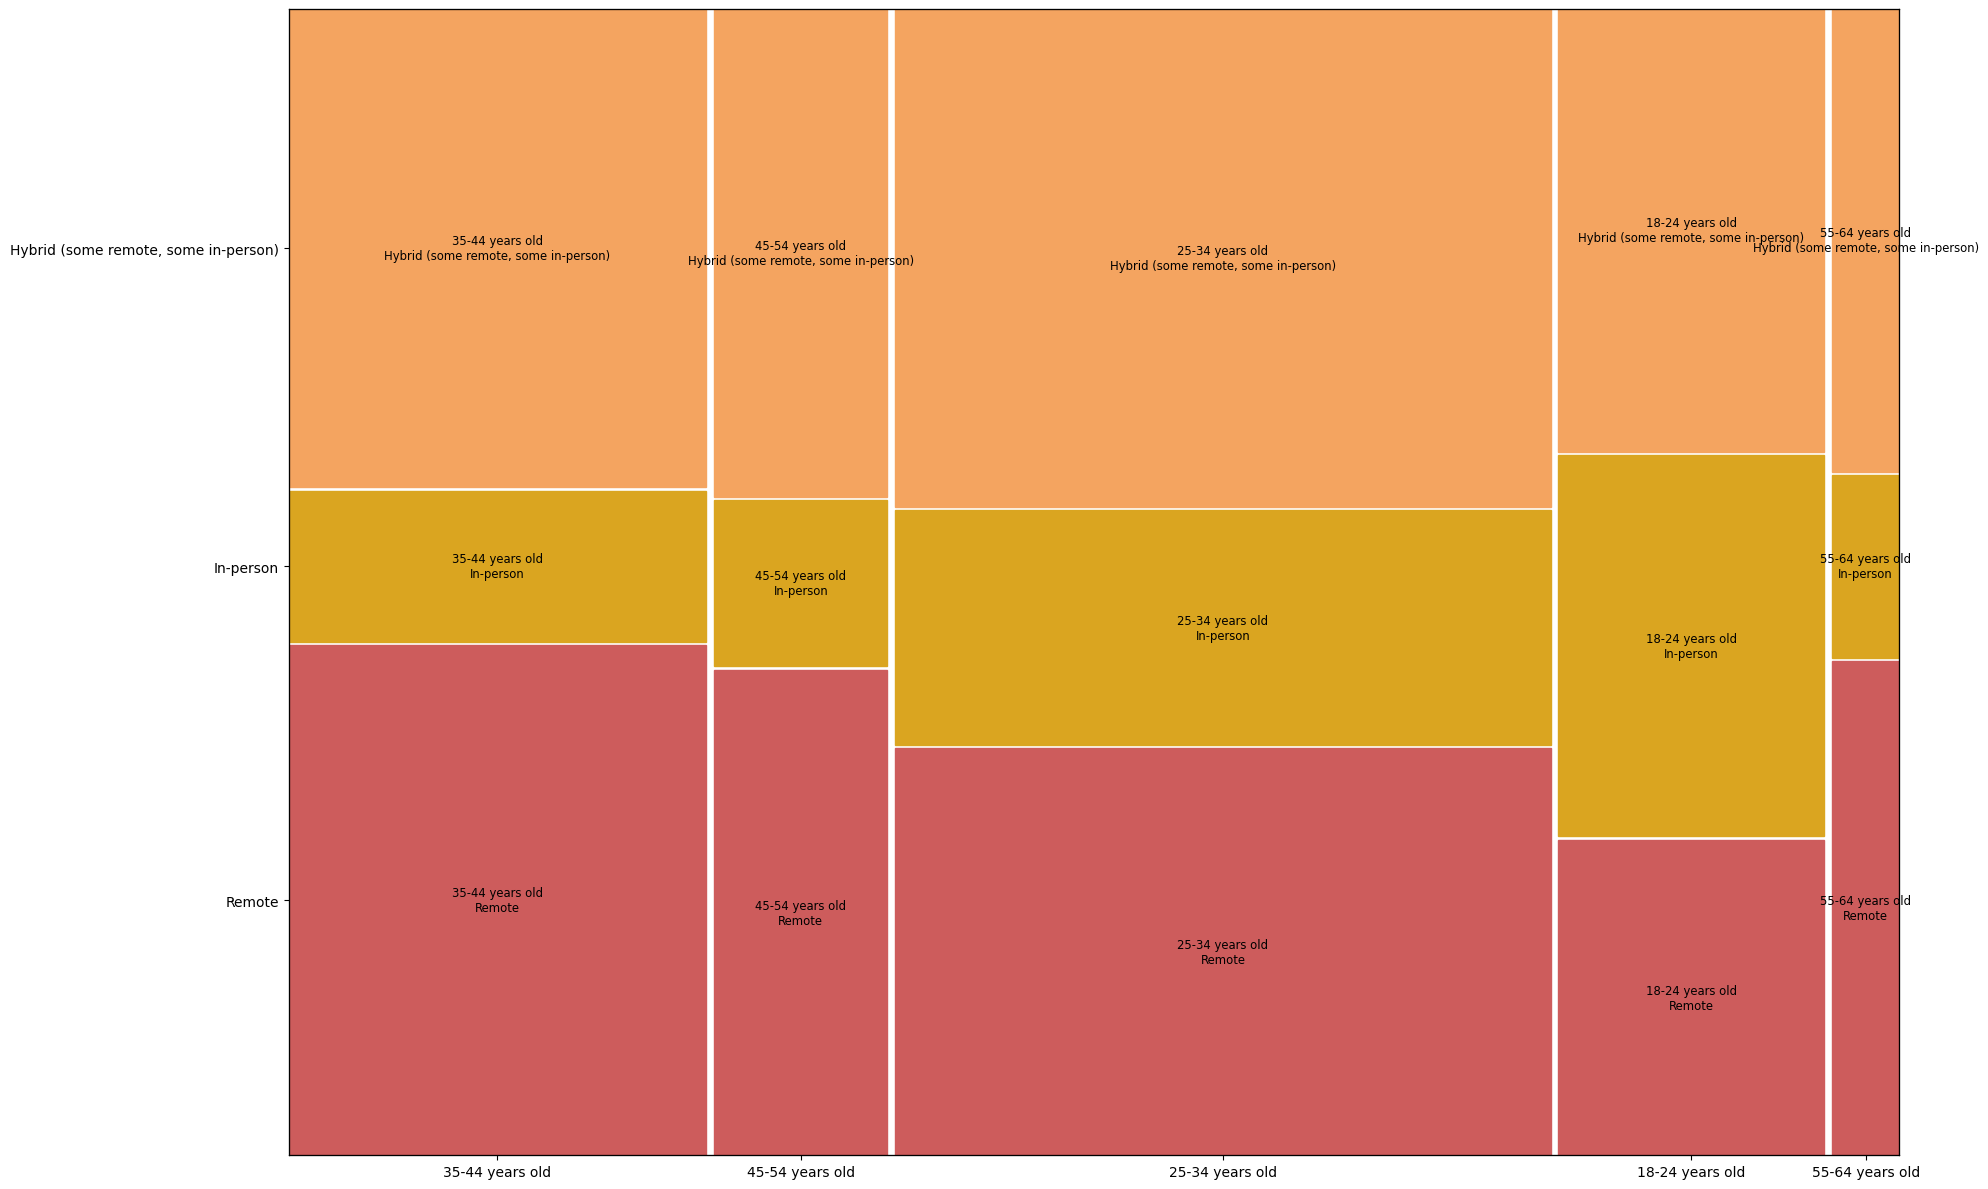

In [46]:
remote_work_order = filtered_data['RemoteWork'].unique()


def get_color2(key):
    index = list(remote_work_order).index(key[1])
    return {'color': colors[index % len(colors)]}

exclude_age=['Prefer not to say','Under 18 years old', '65 years or older']
filtered_data = data[~data['Age'].isin(exclude_age)]
mosaic(filtered_data, ['Age', 'RemoteWork'], properties=get_color2)
plt.show()

We can see that preferred way of working is remote or hybrid. The percentage of people woking in person is the smallest. But there is an exceptional age group that has quite high percentage of people working in-person. These are the youngest participants: 18-24.

We can also see that the groups that have the highest percentage of people working remotely are the oldest ones.

In [47]:
def count_languages(language_string):
    if pd.isna(language_string):
        return 0
    languages = language_string.split(';')
    return len(languages)

#We count the number of languages and create a new column for that value
languages=[count_languages(data.loc[i]['LanguageHaveWorkedWith']) for i in range(len(data))]
data.insert(len(data.columns),"NumberOfLanguages",languages)
data.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,NumberOfLanguages
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Ne

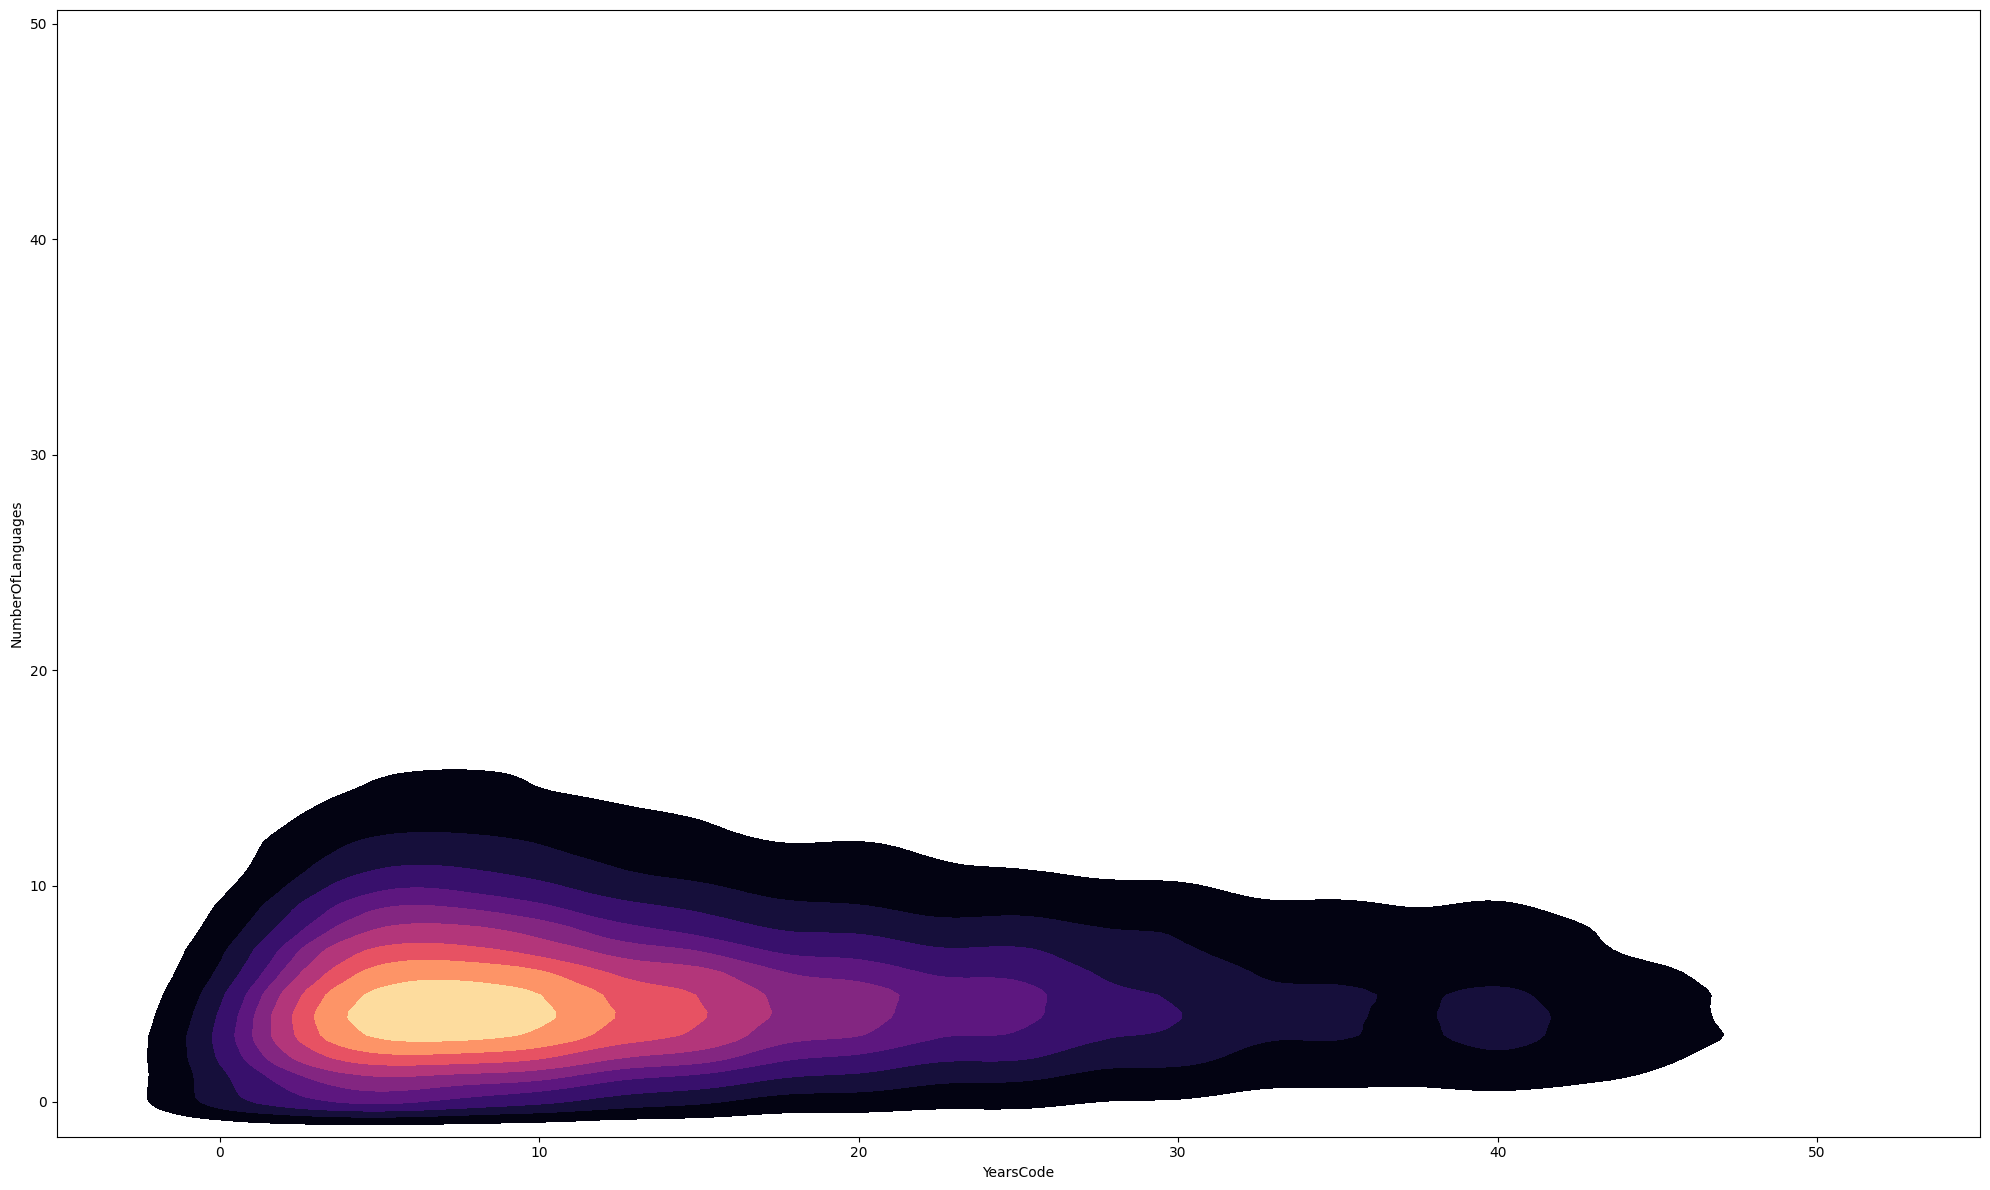

In [48]:
import seaborn as sns

data['YearsCode'] = data['YearsCode'].replace({
    'Less than 1 year': 0,
    'More than 50 years': 50,
    'nan' : 0
})

data['YearsCode'] = pd.to_numeric(data['YearsCode'], errors='coerce')
sns.kdeplot(x=data['YearsCode'], y=data['NumberOfLanguages'], fill=True, cmap='magma')
plt.show()

The plot above shows the probability density estimate for two variables - number of years of coding and number of known languages.

We can see that the largest group of participants have about 5-10 years of experience in coding and know about 3-5 programming languages.

We can also make another interesting observation - when we consider the group of people knowing the biggest amount of languages, it turns out that they have less than 10 years of experience. So the number of known languages dosen't depend only on the number of years of experience.

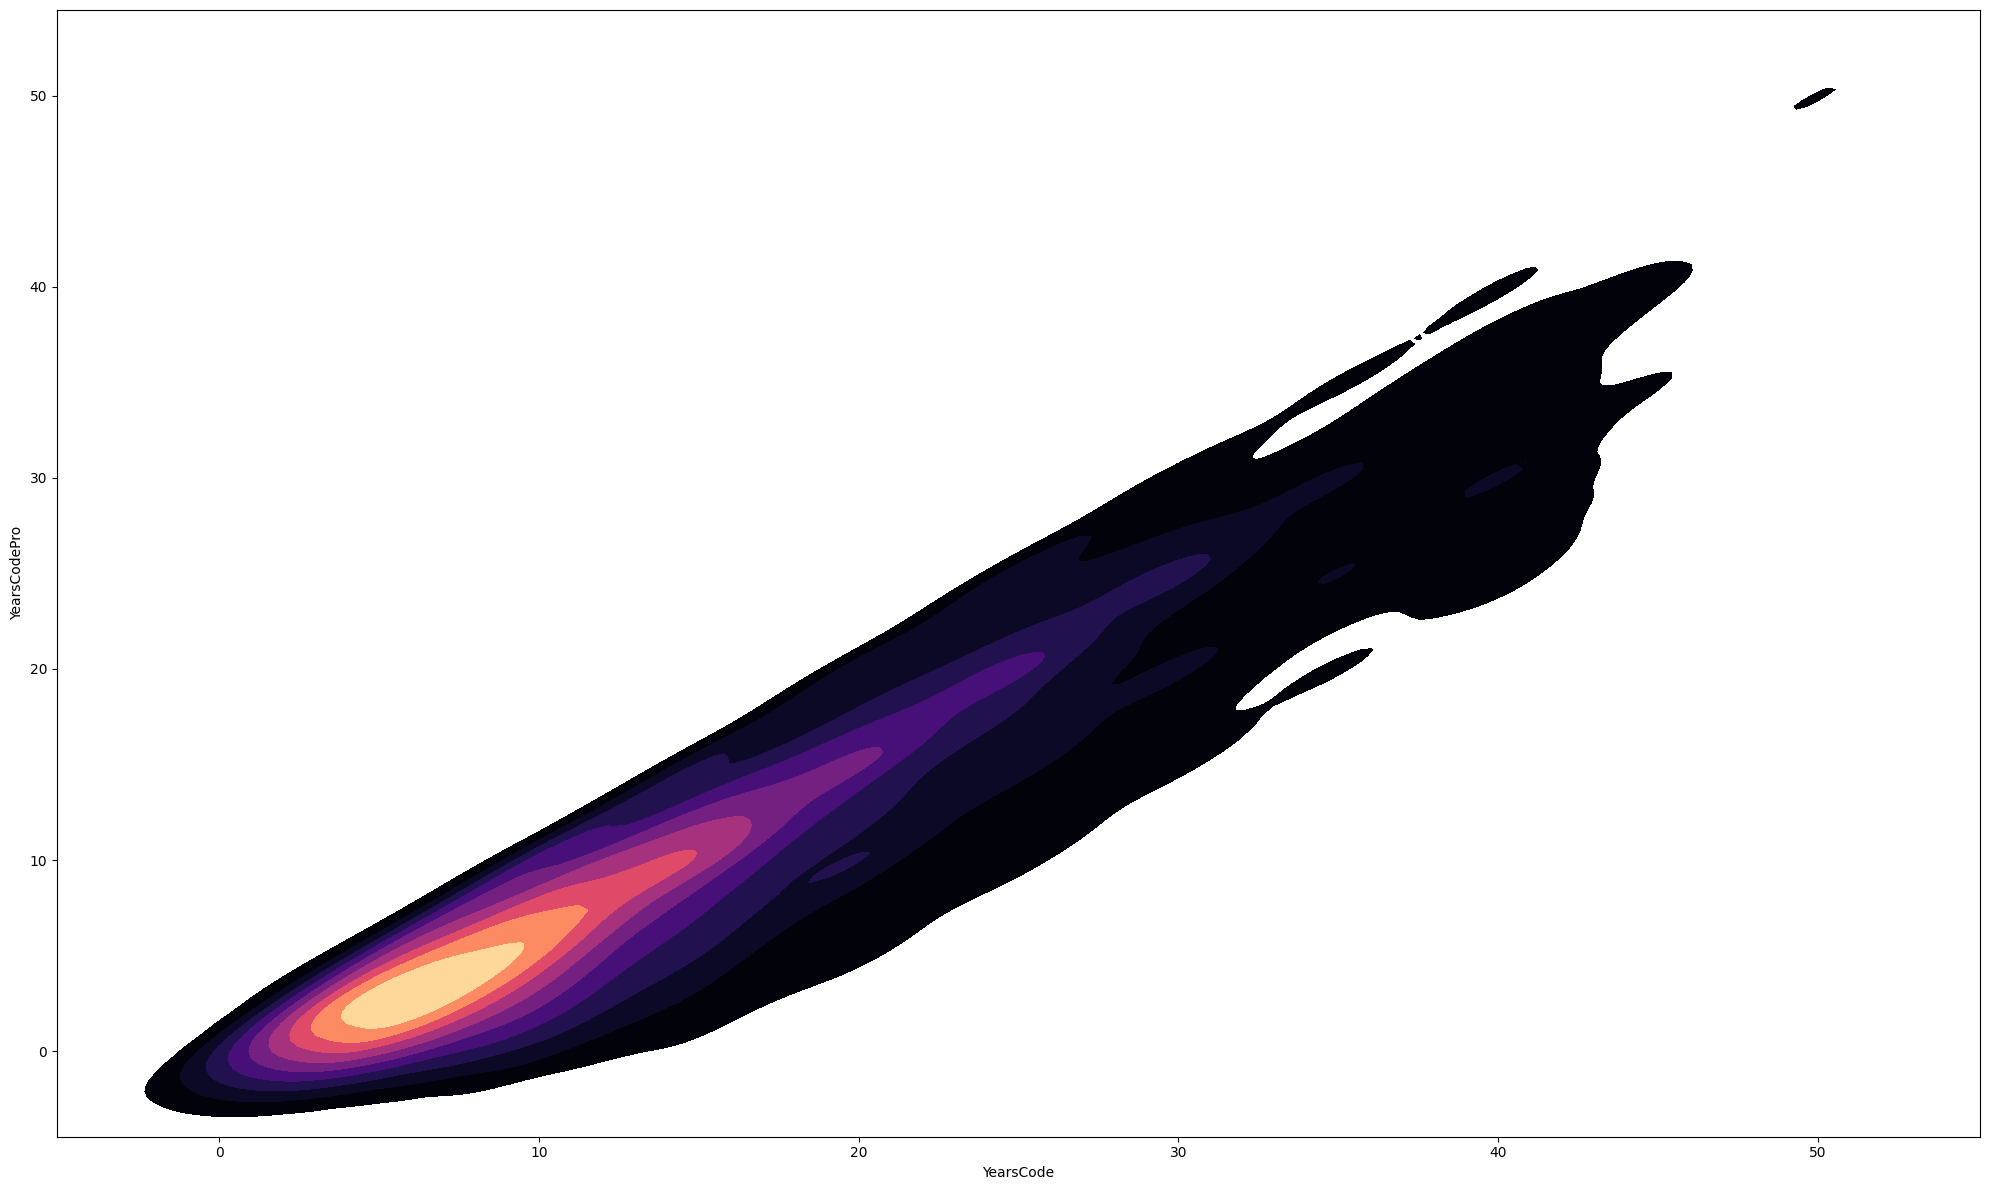

In [49]:
data['YearsCodePro'] = data['YearsCodePro'].replace({
    'Less than 1 year': 0,
    'More than 50 years': 50,
    'nan': 0
})

data['YearsCodePro'] = pd.to_numeric(data['YearsCodePro'], errors='coerce')
sns.kdeplot(x=data['YearsCode'], y=data['YearsCodePro'], fill=True, cmap='magma')
plt.show()


On the plot above we can observe that the largest group of participants has about 4-9 years of experience in coding and about 1-6 years of coding as a professionalist.

We can also see that there is a group of people that almost from the very beginning coded as professionalists.